<a href="https://colab.research.google.com/github/douhua2882/Transformer/blob/main/Layer_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

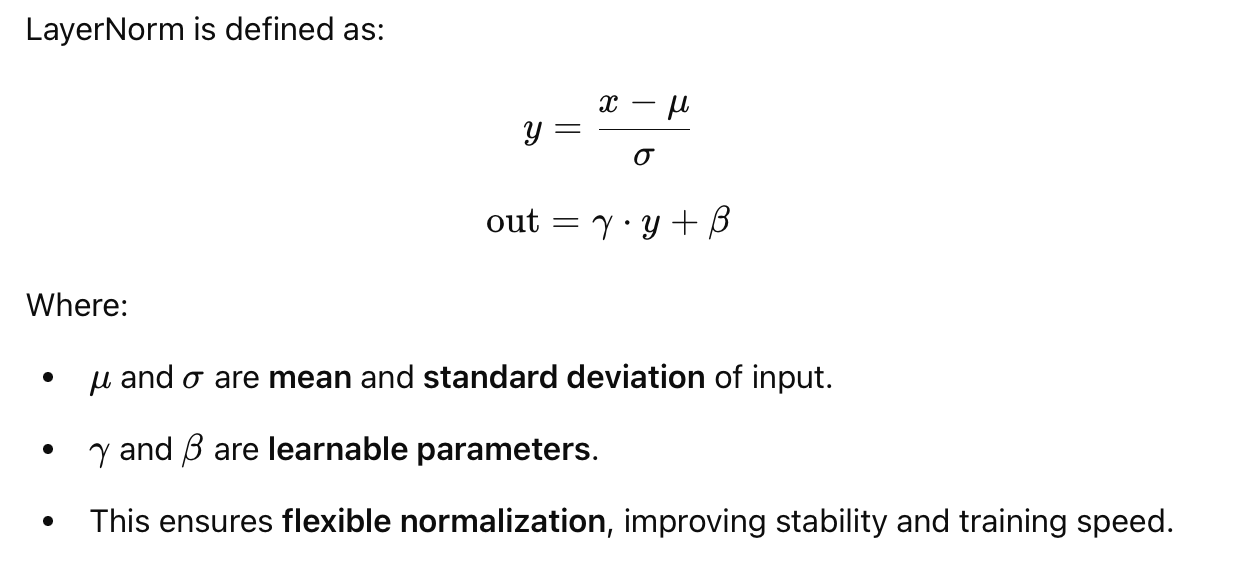

In [ ]:
inputs = torch.Tensor([[[0.2, 0.1, 0.3], [0.5, 0.1, 0.1]]])
B, S, E = inputs.size()
inputs = inputs.reshape(S, B, E)
inputs.shape

torch.Size([2, 1, 3])

In [ ]:
parameter_shape = inputs.size()[-2:]
parameter_shape

torch.Size([1, 3])

In [ ]:
gamma = nn.Parameter(torch.ones(parameter_shape))
beta = nn.Parameter(torch.zeros(parameter_shape))

In [ ]:
gamma.size(), beta.size()

(torch.Size([1, 3]), torch.Size([1, 3]))

In [ ]:
dims = [-(i + 1) for i in range(len(parameter_shape))]   # generates a list of negative indices based on the number of dimensions
dims

[-1, -2]

In [ ]:
mean = inputs.mean(dim=dims, keepdim=True)
mean.size()

torch.Size([2, 1, 1])

In [ ]:
mean

tensor([[[0.2000]],

        [[0.2333]]])

In [ ]:
val = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
epsilon = 1e-5
std = (val + epsilon).sqrt()
std

tensor([[[0.0817]],

        [[0.1886]]])

In [ ]:
y = (inputs - mean) / std
y

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]])

In [ ]:
out = gamma * y + beta

In [ ]:
out

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]], grad_fn=<AddBackward0>)

## Class

In [ ]:
import torch
from torch import nn

class LayerNormalization():
    def __init__(self, parameter_shape, eps=1e-5):
        self.parameter_shape = parameter_shape
        self.eps = eps
        self.gamma = nn.Parameter(torch.ones(parameter_shape))
        self.beta = nn.Parameter(torch.zeros(parameter_shape))

    def forward(self, inputs):
        dims = [-(i + 1) for i in range(len(self.parameter_shape))]
        mean = inputs.mean(dim=dims, keepdim=True)
        print(f"Mean \n ({mean.size()}): \n {mean}")
        var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
        std = (var + self.eps).sqrt()
        print(f"Standard Deviation \n ({std.size()}): \n {std}")
        y = (inputs -mean) / std
        print(f"y \n ({y.size()}) = \n {y}")
        out = self.gamma * y + self.beta
        print(f"out \n {out.size()} = \n {out}")
        return out

In [ ]:
batch_size = 3
sentence_length = 5
embedding_dim = 8
inputs = torch.randn(sentence_length, batch_size, embedding_dim)

print(f"input \n ({inputs.size()}) = \n {inputs}")

input 
 (torch.Size([5, 3, 8])) = 
 tensor([[[-1.1194,  0.3455,  0.3594, -1.4124, -0.7242,  0.4947, -0.3763,
           0.8761],
         [ 0.8742, -0.5574, -0.1546,  0.0370,  2.2339, -0.2286,  0.1250,
           2.1285],
         [ 0.6664,  1.6593,  0.8465, -0.1930,  0.2179, -1.5242, -0.3205,
           0.2792]],

        [[ 3.2235, -0.0400, -0.2600,  0.4298,  1.4215, -0.9157, -0.1220,
          -0.2673],
         [-0.6233, -0.0950,  0.2928,  2.0238,  1.4745,  1.2230, -0.3288,
           0.0709],
         [ 0.9502, -0.7616,  0.0999, -1.9228,  0.6817,  1.6887, -1.2035,
          -0.6603]],

        [[-0.4238,  0.8128,  0.1091,  0.4961, -0.4149, -0.2697, -0.3202,
           0.6374],
         [ 0.0317,  1.1744,  1.3775, -0.8194,  0.9309,  0.8835,  0.6337,
           1.1102],
         [ 2.3966,  0.6749, -0.5339,  1.2818, -0.2549, -0.3144,  1.7780,
          -0.7655]],

        [[-0.2632, -0.6933, -1.2499,  0.0931, -0.7488, -1.0119,  1.1535,
           0.2587],
         [ 0.9390, -1.3194, 

In [ ]:
layer_norm = LayerNormalization(inputs.size()[-1:])

In [ ]:
out = layer_norm.forward(inputs)

Mean 
 (torch.Size([5, 3, 1])): 
 tensor([[[-0.1946],
         [ 0.5573],
         [ 0.2039]],

        [[ 0.4337],
         [ 0.5048],
         [-0.1409]],

        [[ 0.0784],
         [ 0.6653],
         [ 0.5328]],

        [[-0.3077],
         [-0.2934],
         [-0.3732]],

        [[ 0.3099],
         [ 0.2712],
         [ 0.4641]]])
Standard Deviation 
 (torch.Size([5, 3, 1])): 
 tensor([[[0.7804],
         [1.0127],
         [0.8782]],

        [[1.2291],
         [0.8891],
         [1.1309]],

        [[0.4747],
         [0.6791],
         [1.1050]],

        [[0.7370],
         [0.7308],
         [0.2474]],

        [[0.9520],
         [0.4990],
         [0.9316]]])
y 
 (torch.Size([5, 3, 8])) = 
 tensor([[[-1.1851,  0.6921,  0.7099, -1.5605, -0.6787,  0.8832, -0.2329,
           1.3720],
         [ 0.3130, -1.1007, -0.7029, -0.5137,  1.6556, -0.7760, -0.4268,
           1.5515],
         [ 0.5266,  1.6572,  0.7317, -0.4520,  0.0159, -1.9679, -0.5972,
           0.0857]],



In [ ]:
out[0].mean(), out[0].std()

(tensor(-1.9868e-08, grad_fn=<MeanBackward0>),
 tensor(1.0215, grad_fn=<StdBackward0>))